# Start Project

### Step 0 - Define base of Project

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
import numpy as np

### Step 1 - Add data to project

In [233]:
linkdin = pd.read_csv('country_migration_public.csv', header=0, sep=',')

#### Attributes of data

In [234]:
# linkdin.head()
# linkdin.shape
linkdin.info()
# linkdin.describe()
# linkdin['base_country_wb_income'].unique()
# linkdin['base_country_wb_region'].unique()
linkdin['target_country_wb_income'].unique()
# linkdin['target_country_wb_region'].unique()
# linkdin['target_country_wb_income'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4148 entries, 0 to 4147
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   base_country_code         4148 non-null   object 
 1   base_country_name         4148 non-null   object 
 2   base_lat                  4148 non-null   float64
 3   base_long                 4148 non-null   float64
 4   base_country_wb_income    4148 non-null   object 
 5   base_country_wb_region    4148 non-null   object 
 6   target_country_code       4148 non-null   object 
 7   target_country_name       4148 non-null   object 
 8   target_lat                4148 non-null   float64
 9   target_long               4148 non-null   float64
 10  target_country_wb_income  4148 non-null   object 
 11  target_country_wb_region  4148 non-null   object 
 12  net_per_10K_2015          4148 non-null   float64
 13  net_per_10K_2016          4148 non-null   float64
 14  net_per_

array(['Low Income', 'Upper Middle Income', 'Lower Middle Income',
       'High Income'], dtype=object)

#### Histogram Chart of data

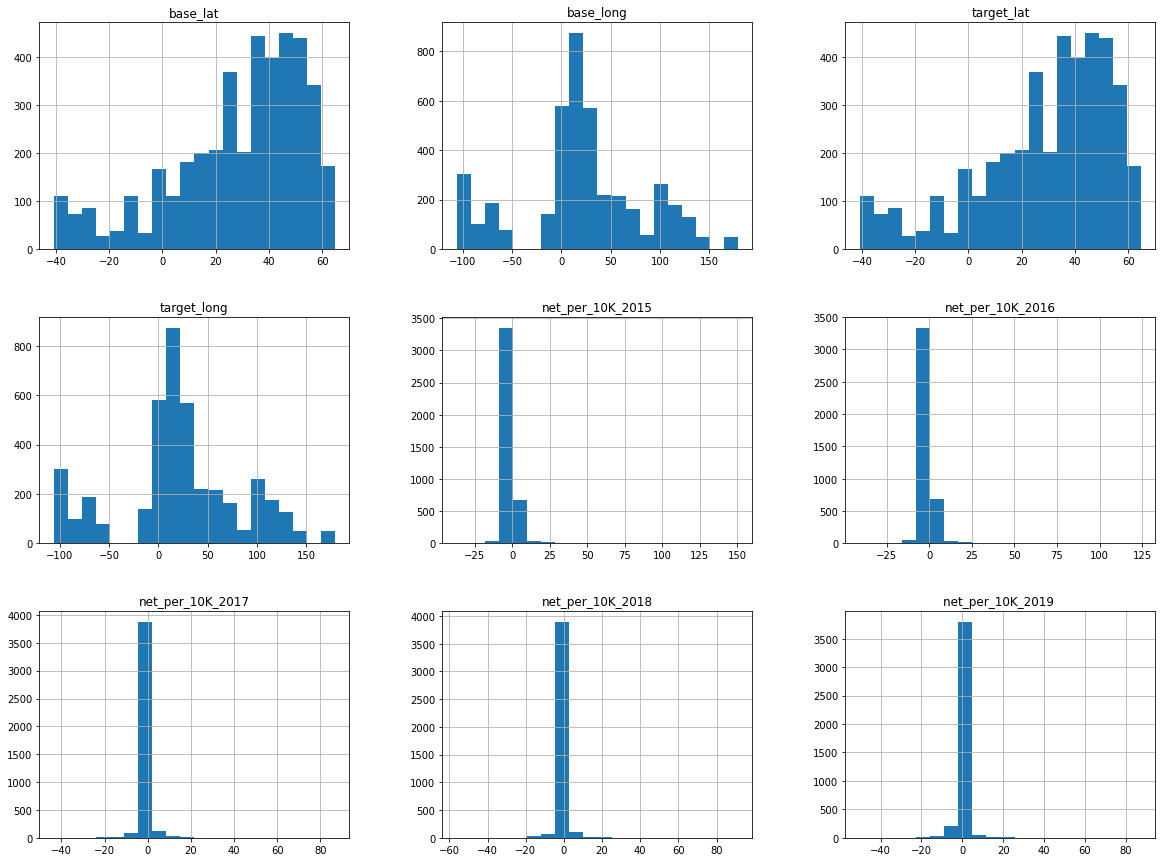

In [235]:
linkdin.hist(bins=20,figsize=(20,15))
plt.show()

#### Seprate test and train data

In [236]:
train_set,test_set=train_test_split(linkdin,test_size=0.2,random_state=100)
test_set.shape

(830, 17)

### Step 2 - Show data and charts

C:\Users\Riz Pardazandeh\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


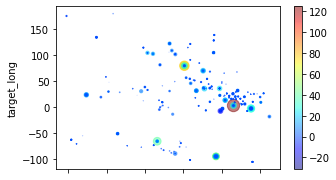

In [237]:
data=train_set.copy()
data.plot(kind='scatter',x='target_lat',y='target_long',
          s=data['net_per_10K_2015'],
c=data['net_per_10K_2016'],cmap=plt.get_cmap('jet'),
figsize=(5,3),alpha=0.5)
plt.show()
# data.head()

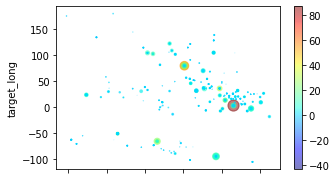

In [238]:
data.plot(kind='scatter', x='target_lat', y='target_long',
          s=data['net_per_10K_2016'],
          c=data['net_per_10K_2017'], cmap=plt.get_cmap('jet'),
          figsize=(5, 3), alpha=0.5)
plt.show()


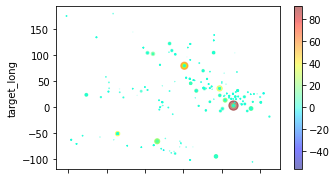

In [239]:
data.plot(kind='scatter', x='target_lat', y='target_long',
          s=data['net_per_10K_2017'],
          c=data['net_per_10K_2018'], cmap=plt.get_cmap('jet'),
          figsize=(5, 3), alpha=0.5)
plt.show()


#### Standard Corelation Coefficient

In [240]:
corr_matrix=data.corr()
corr_matrix['net_per_10K_2015'].sort_values(ascending=False)


net_per_10K_2015     1.000000
net_per_10K_2016     0.922809
net_per_10K_2017     0.728606
net_per_10K_2018     0.674981
net_per_10K_2019     0.621520
target_lat           0.019678
base_long            0.018761
target_long         -0.074843
base_lat            -0.090094
Name: net_per_10K_2015, dtype: float64

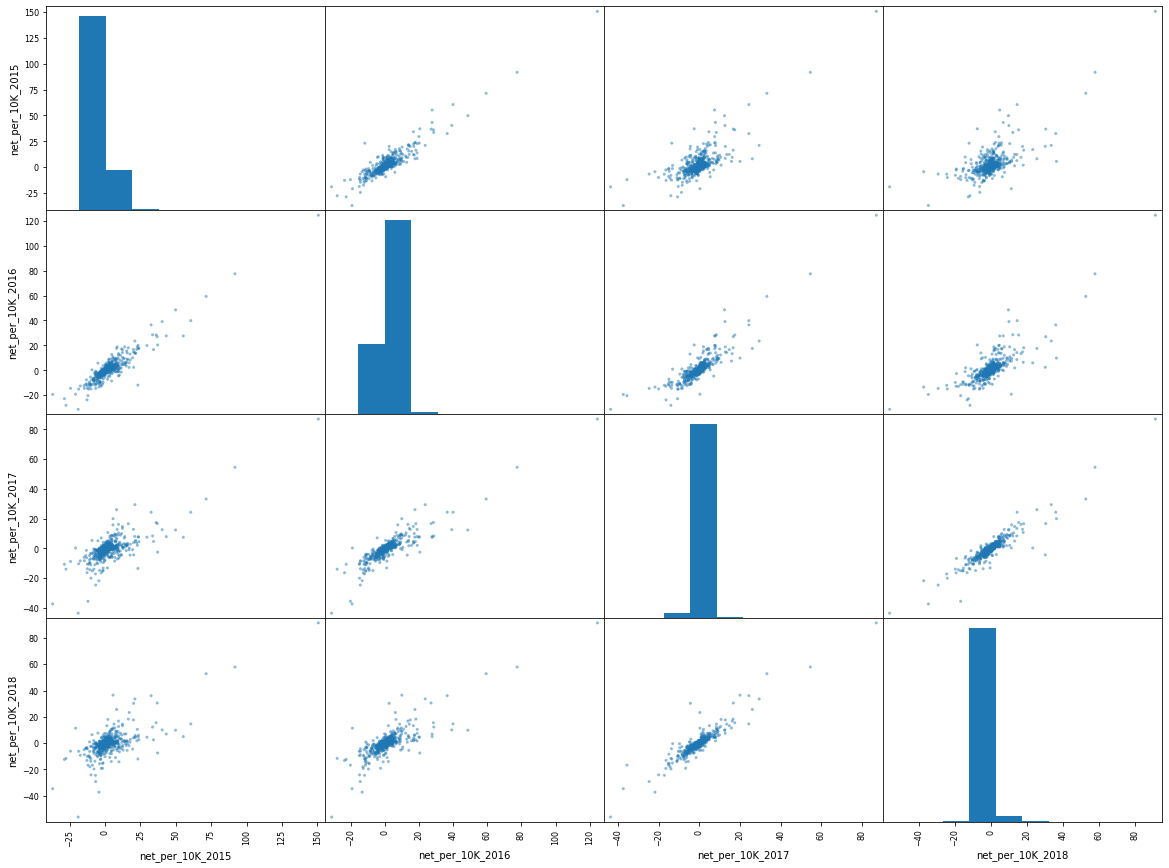

In [248]:
features = ['net_per_10K_2015', 'net_per_10K_2016',
            'net_per_10K_2017', 'net_per_10K_2018']
scatter_matrix(data[features],figsize=(20,15))
plt.show()

### Step 3 - Data Cleaning

#### SimpleImputer

In [249]:
df=train_set.copy()
df_lable = df[['net_per_10K_2015', 'net_per_10K_2016',
               'net_per_10K_2017', 'net_per_10K_2018']]
df=df.drop(['net_per_10K_2015','net_per_10K_2016','net_per_10K_2017','net_per_10K_2018'],axis=1)

##### Delete non number columns

In [250]:
df_num=df.drop(['base_country_wb_region','base_country_wb_income','base_country_name','base_country_code','target_country_code','target_country_name','target_country_wb_region','target_country_wb_income'],axis=1)
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
imputer.fit(df_num)
x=imputer.transform(df_num)
df_num_imput_tr=pd.DataFrame(x,columns=df_num.columns)
df_num_imput_tr.head()

,base_lat,base_long,target_lat,target_long,net_per_10K_2019
0,41.608635,21.745275,51.165691,10.451526,-11.88
1,36.204824,138.252924,49.817492,15.472962,0.01
2,-40.900557,174.885971,46.227638,2.213749,0.06
3,26.820553,30.802498,7.946527,-1.023194,-0.14
4,44.016521,21.005859,51.165691,10.451526,-7.12


#### Standardization

In [251]:
from sklearn.preprocessing import StandardScaler

feature_scal=StandardScaler()
data_num_sacled_tr=pd.DataFrame(feature_scal.fit_transform(df_num_imput_tr.values),columns=df_num_imput_tr.columns)
data_num_sacled_tr.head()


,base_lat,base_long,target_lat,target_long,net_per_10K_2019
0,0.517940,0.006527,0.909665,-0.177744,-3.132553
1,0.300297,1.894317,0.855691,-0.096278,0.010944
2,-2.805183,2.487888,0.711976,-0.311390,0.024163
3,-0.077662,0.153282,-0.820565,-0.363905,-0.028713
4,0.614919,-0.005454,0.909665,-0.177744,-1.874097


#### Category to number

In [252]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data_cat=df['base_country_wb_income']
data_cat_encoder_1=encoder.fit_transform(data_cat)
data_cat_encoder_1 = pd.DataFrame(data_cat_encoder_1,columns=['income base'])
data_cat_encoder_1.head()


,income base
0,3
1,0
2,0
3,2
4,3


In [253]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_cat = df['target_country_wb_income']
data_cat_encoder_2 = encoder.fit_transform(data_cat)
data_cat_encoder_2 = pd.DataFrame(data_cat_encoder_2, columns=['income target'])
data_cat_encoder_2.head()


,income target
0,0
1,0
2,0
3,2
4,0


#### Concat all data

In [254]:
final = pd.concat(
    [data_num_sacled_tr, data_cat_encoder_1, data_cat_encoder_2], axis=1)
final.head()

,base_lat,base_long,target_lat,target_long,net_per_10K_2019,income base,income target
0,0.517940,0.006527,0.909665,-0.177744,-3.132553,3,0
1,0.300297,1.894317,0.855691,-0.096278,0.010944,0,0
2,-2.805183,2.487888,0.711976,-0.311390,0.024163,0,0
3,-0.077662,0.153282,-0.820565,-0.363905,-0.028713,2,2
4,0.614919,-0.005454,0.909665,-0.177744,-1.874097,3,0
